# 第 5 章　正态线性模型｜用 Python 动手学统计学

## 第 2 节　方差分析

### 8. 环境准备

In [3]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 9. 生成数据并可视化

In [4]:
# 定义一组示例数据
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]

# 转换成数据帧
weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<Axes: xlabel='weather', ylabel='beer'>

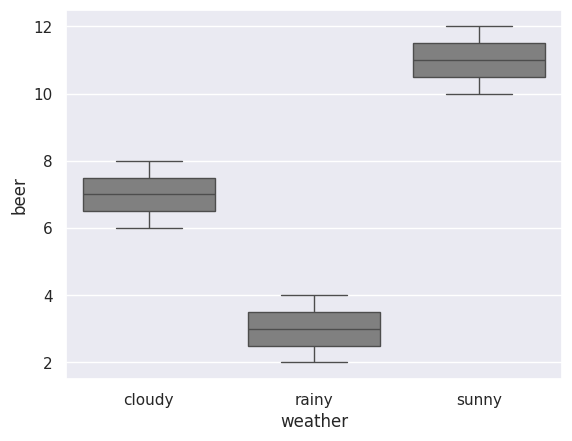

In [5]:
# 绘出箱形图
sns.boxplot(x = "weather",y = "beer",
            data = weather_beer, color='gray')

In [6]:
# 每种天气下销售额的均值
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


### 10. 实现：方差分析①：计算组间平方和与组内平方和

In [7]:
# 天气的影响 (对应 weather 变量)
effect = [7,7,3,3,11,11]

In [8]:
# 组间偏差平方和
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2 )
squares_model

AttributeError: Module 'scipy' has no attribute 'mean'

In [ ]:
# 无法用天气来解释的部分, 即误差
resid = weather_beer.beer - effect
resid

In [ ]:
# 组内偏差平方和
squares_resid = sp.sum(resid ** 2)
squares_resid

### 11. 实现：方差分析②：计算组间方差与组内方差

In [ ]:
df_model = 2 # 组间差异的自由度
df_resid = 3 # 组内差异的自由度

In [ ]:
# 组间均方 (方差)
variance_model = squares_model / df_model
variance_model

In [ ]:
# 组内均方 (方差)
variance_resid = squares_resid / df_resid
variance_resid

### 12. 实现：方差分析③：计算 p 值

In [ ]:
# F 比
f_ratio = variance_model / variance_resid
f_ratio

In [ ]:
# p 值
1 - sp.stats.f.cdf(x=f_ratio,dfn=df_model,dfd=df_resid)

### 15. 实现：statsmodels 中的方差分析

In [ ]:
# 建立正态线性模型
anova_model = smf.ols("beer ~ weather",
                      data = weather_beer).fit()

In [ ]:
# 方差分析的结果
print(sm.stats.anova_lm(anova_model, typ=2))

### 17. 模型系数的含义

In [ ]:
anova_model.params

### 18. 使用模型分离效应和误差

In [ ]:
# 拟合值
fitted = anova_model.fittedvalues
fitted

In [ ]:
# 残差
anova_model.resid

### 19. 回归模型中的方差分析

In [ ]:
# 读取数据
beer = pd.read_csv("5-1-1-beer.csv")

# 估计模型
lm_model = smf.ols(formula = "beer ~ temperature",
                   data = beer).fit()

In [ ]:
df_lm_model = 1  # 模型自由度
df_lm_resid = 28 # 残差自由度

In [ ]:
# 拟合值
lm_effect = lm_model.fittedvalues
# 残差
lm_resid = lm_model.resid
# 气温的影响力度
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model
# 残差的方差
squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F 比
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

In [ ]:
# 参考: p 值 (结果在截断后约等于 0)
1 - sp.stats.f.cdf(
    x=f_value_lm,dfn=df_lm_model,dfd=df_lm_resid)

In [ ]:
# 方差分析表
print(sm.stats.anova_lm(lm_model, typ=2))

In [ ]:
# 模型的 sumamry
lm_model.summary()